<a href="https://colab.research.google.com/github/Harsh-248/Security_Data_Wrangling/blob/main/Security_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context: You are the cybersecurity expert of a company. In the last month, some cybersecurity events with different durations and patterns have been registered

1) Most targeted Destination IP addresses
2) Most logical ports attacked
3) Most Frequently/common type of attack
4) Different time of the day, hours, or night
5) Find the pattern

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipaddress
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Cybersecurity_attacks.csv')
df.shape

(5265, 11)

In [4]:
df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [5]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


Now, We're splitting the time column by start and last time

In [6]:
df[['Start time','Last time']] = df['Time'].str.split('-',expand=True)
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


In [7]:
df['.'].unique()

array(['.', nan], dtype=object)

In [8]:
df = df.drop(['.','Time'],axis=1) #Drop columns and make a copy in memory of the object
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418


In [9]:
df.shape

(5265, 11)

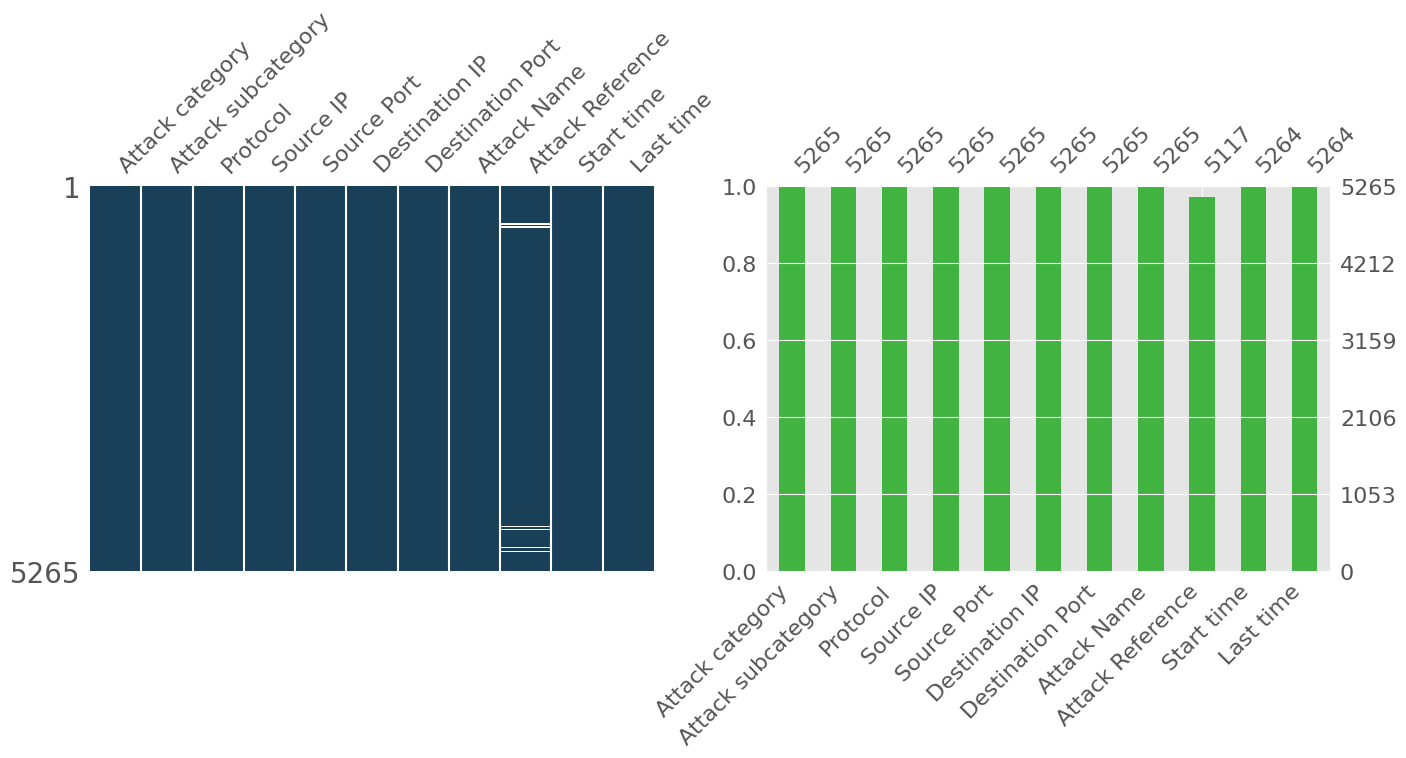

In [10]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25))
plt.show()

In [11]:
df["Attack subcategory"] = df["Attack subcategory"].fillna("Not registered")
df.isnull().sum()

,0
Attack category,0
Attack subcategory,0
Protocol,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
Attack Name,0
Attack Reference,148
Start time,1


In [12]:
df[pd.isnull(df).any(axis = 1)].shape

(148, 11)

In [13]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [14]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time


In [15]:
df = df[-(invalid_SP | invalid_DP)].reset_index(drop=True)
df.shape

(5265, 11)

In [16]:
print('Total number of different protocol:' , len(df['Protocol'].unique()))
print('Total number of different Attack categories:' , len(df['Attack category'].unique()))
df['Protocol'].unique()

Total number of different protocol: 15
Total number of different Attack categories: 9


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2'],
      dtype=object)

In [17]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis'], dtype=object)

In [18]:
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOORS')
df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418
...,...,...,...,...,...,...,...,...,...,...,...
5260,DOS,Microsoft Office,TCP,175.45.176.2,22641,149.171.126.18,110,Microsoft Excel NULL Pointer DoS (B) (POP3) (h...,CVE 2007-1239 (http://cve.mitre.org/cgi-bin/cv...,1421930627,1421930628
5261,RECONNAISSANCE,SunRPC Portmapper (UDP) UDP Service,UDP,175.45.176.0,49292,149.171.126.18,111,SunRPC UDP Portmapper GETPORT Request (admindv...,-,1421930628,1421930628
5262,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.1,2726,149.171.126.13,80,Novell Groupwise WebAccess Directory Traversal...,CVE 2010-3058 (http://cve.mitre.org/cgi-bin/cv...,1421930629,1421930629
5263,SHELLCODE,Linux,TCP,175.45.176.2,31331,149.171.126.17,21148,Shellcode: Linux x86 Reverse Connect Shell - m...,-,1421930630,1421930630


In [19]:
print('Total number of different protocols:', len(df['Protocol'].unique()))
print('Total number of different Attack categories:', len(df['Attack category'].unique()))


Total number of different protocols: 13
Total number of different Attack categories: 9


In [20]:
df[pd.isnull(df['Attack Reference'])][:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time
258,FUZZERS,OSPF,OSPF,175.45.176.3,0,149.171.126.14,0,"Fuzzer: OSPF Hello Packet: Invalid Length, Lon...",NaN,1421927643,1421927645
500,FUZZERS,BGP,TCP,175.45.176.2,63685,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927755
501,FUZZERS,BGP,TCP,175.45.176.2,48413,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927755,1421927756
502,FUZZERS,BGP,TCP,175.45.176.2,30451,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756
503,FUZZERS,BGP,TCP,175.45.176.2,58077,149.171.126.13,179,"BGP Header: Random Payload, Bad Length (https:...",NaN,1421927756,1421927756


In [21]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

Attack category
FUZZERS     146
DOS           1
EXPLOITS      1
Name: count, dtype: int64


In [22]:
print(df['Attack category'].value_counts())

Attack category
EXPLOITS          2076
FUZZERS           1686
RECONNAISSANCE     793
DOS                294
GENERIC            271
SHELLCODE          103
BACKDOORS           27
WORMS               11
ANALYSIS             4
Name: count, dtype: int64


In [23]:
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)

,count
Attack category,
FUZZERS,8.659549
DOS,0.340136
EXPLOITS,0.048170


In [24]:
tcp_ports =  pd.read_csv('TCP-ports.csv')
tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head(10)

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry
5,7,ECHO,Echo
6,9,DISCARD,Discard
7,11,SYSTAT,Active Users
8,13,DAYTIME,Daytime
9,15,NaN,Unassigned [was netstat]


In [25]:
print("Dimensions before merging dataframes: " , (df.shape))
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port',how='left')
newdf = newdf.rename(columns={'Service':'Destination Service'})

print("Dimensions after merging dataframes: " + str(newdf.shape))

Dimensions before merging dataframes:  (5265, 11)
Dimensions after merging dataframes: (5265, 13)


In [26]:
newdf = newdf.drop(columns=['Port'])
newdf.head()


,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,1421927414,1421927416,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,1421927415,1421927415,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,1421927416,1421927416,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,1421927417,1421927417,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,1421927418,1421927418,HTTP


In [27]:
newdf['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOORS', 'ANALYSIS'], dtype=object)

In [28]:
newdf['Attack category'].value_counts()

,count
Attack category,
EXPLOITS,2076
FUZZERS,1686
RECONNAISSANCE,793
DOS,294
GENERIC,271
SHELLCODE,103
BACKDOORS,27
WORMS,11
ANALYSIS,4


In [29]:
newdf['Attack category'].value_counts()*100/newdf["Attack category"].value_counts().sum()

,count
Attack category,
EXPLOITS,39.430199
FUZZERS,32.022792
RECONNAISSANCE,15.061728
DOS,5.584046
GENERIC,5.147198
SHELLCODE,1.956315
BACKDOORS,0.512821
WORMS,0.208927
ANALYSIS,0.075973


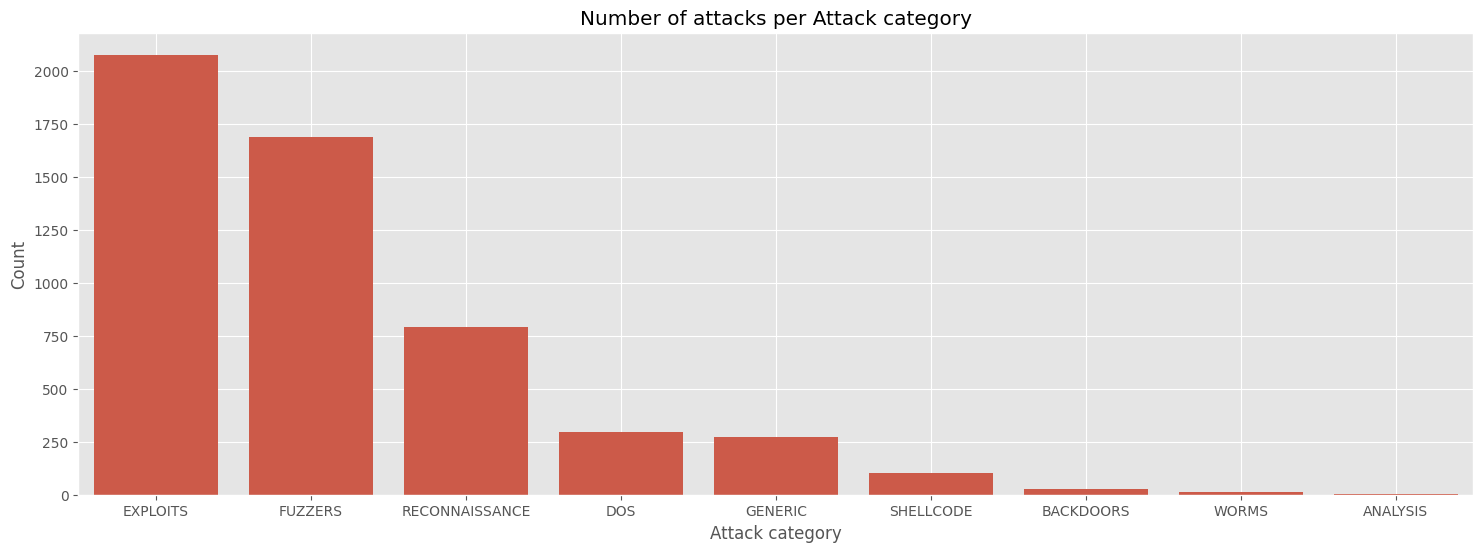

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts().values)
plt.xlabel('Attack category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack category')
plt.grid(True)

In [31]:
pd.DataFrame(newdf['Attack category'].value_counts())[:5]

,count
Attack category,
EXPLOITS,2076
FUZZERS,1686
RECONNAISSANCE,793
DOS,294
GENERIC,271


In [32]:
a=pd.DataFrame(newdf['Attack category'].value_counts())[:5]

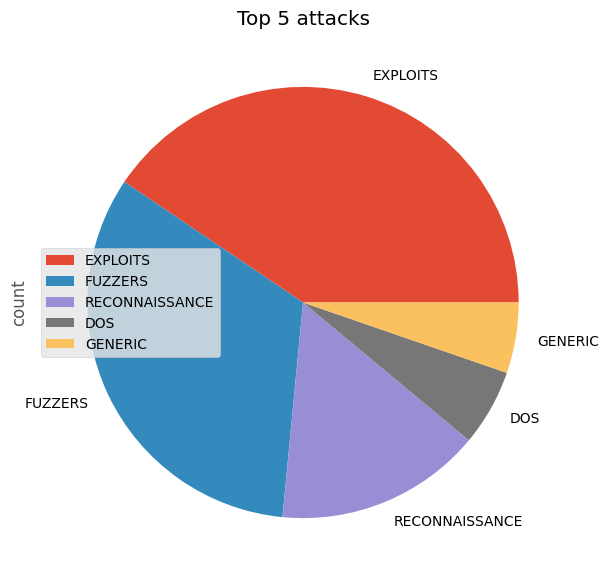

In [33]:
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top 5 attacks')
plt.legend(loc='center left')
plt.show()

**NOW TO ANALYSE Attacks With Date and Time**

In [34]:
newdf['Start time']

,Start time
0,1421927414
1,1421927415
2,1421927416
3,1421927417
4,1421927418
...,...
5260,1421930627
5261,1421930628
5262,1421930629
5263,1421930630


In [35]:
newdf['Start time'] = pd.to_datetime(newdf['Start time'], unit='s')
newdf['Last time'] = pd.to_datetime(newdf['Last time'], unit='s')
newdf['Duration'] = ((newdf['Last time'] - newdf['Start time']).dt.total_seconds()
                     .fillna(0)  # Replace NaN with 0
                     .astype(int))  # Convert to integer



In [36]:
newdf[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start time,Last time,Destination Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0


In [37]:
newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', 'NaT'], dtype=object)

In [38]:
newdf.describe()

,Source Port,Destination Port,Start time,Last time,Duration
count,5265.000000,5265.000000,5264,5264,5265.000000
mean,32415.569421,2940.881861,2015-01-22 12:15:01.614551808,2015-01-22 12:15:03.192628992,1.577778
min,0.000000,0.000000,2015-01-22 11:50:14,2015-01-22 11:50:15,0.000000
25%,14235.000000,80.000000,2015-01-22 12:01:16.750000128,2015-01-22 12:01:18.750000128,0.000000
50%,32029.000000,111.000000,2015-01-22 12:12:46,2015-01-22 12:12:49.500000,1.000000
75%,50474.000000,445.000000,2015-01-22 12:28:01.249999872,2015-01-22 12:28:04.249999872,1.000000
max,65534.000000,65535.000000,2015-01-22 12:43:50,2015-01-22 12:43:50,60.000000
std,20381.585827,11125.583980,NaN,NaN,5.455303


Mean and 75% is very different for SourcePort and Destination Port is very different. However minimum and maximum is same. Here comes the Hypothesis testing

H0 : U1 = u2
H1 : U1 != u2

In [39]:
statistic, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)
print ('p-value in T-test: ' + str(pvalue))

p-value in T-test: 0.0


In [40]:
newdf.select_dtypes(include=['number']).corr(method='pearson')


,Source Port,Destination Port,Duration
Source Port,1.000000,0.002937,-0.017874
Destination Port,0.002937,1.000000,-0.034710
Duration,-0.017874,-0.034710,1.000000


In [41]:
newdf.select_dtypes(include=['number']).corr(method='spearman')


,Source Port,Destination Port,Duration
Source Port,1.000000,0.065024,-0.017340
Destination Port,0.065024,1.000000,-0.192053
Duration,-0.017340,-0.192053,1.000000


In [42]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])


In [43]:
corr_matrix = df_dummies.select_dtypes(include=['number']).corr(method='pearson')


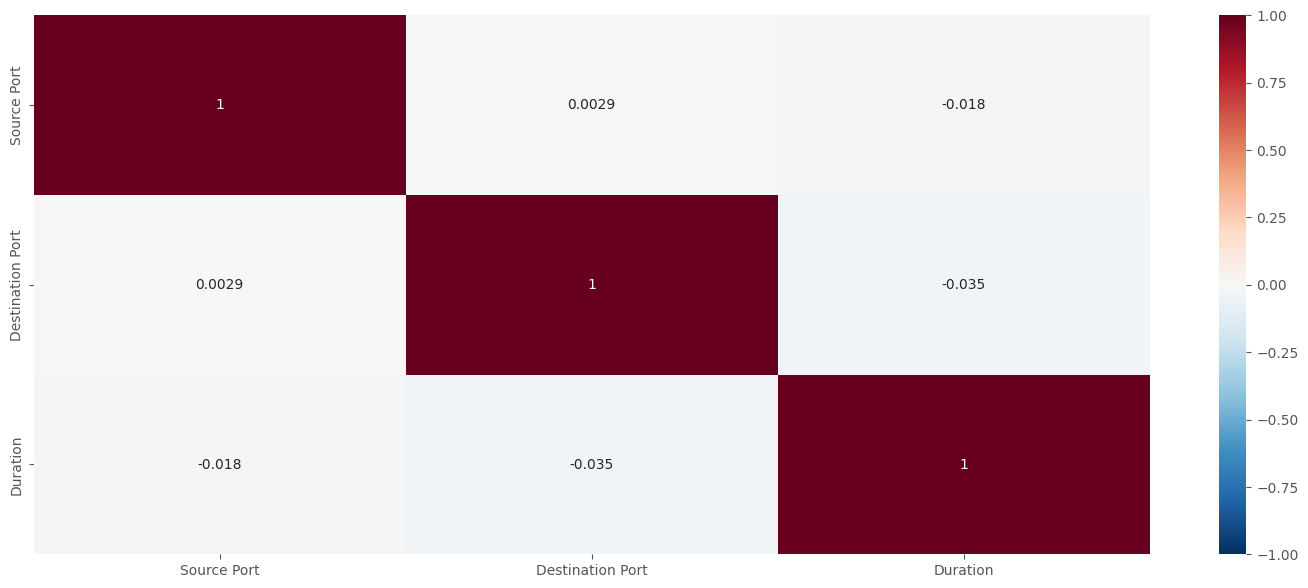

In [44]:
plt.figure(figsize=(18,7))
sns.heatmap(corr_matrix, annot=True, vmin=-1.0, cmap=sns.color_palette("RdBu_r", as_cmap=True))
plt.show()


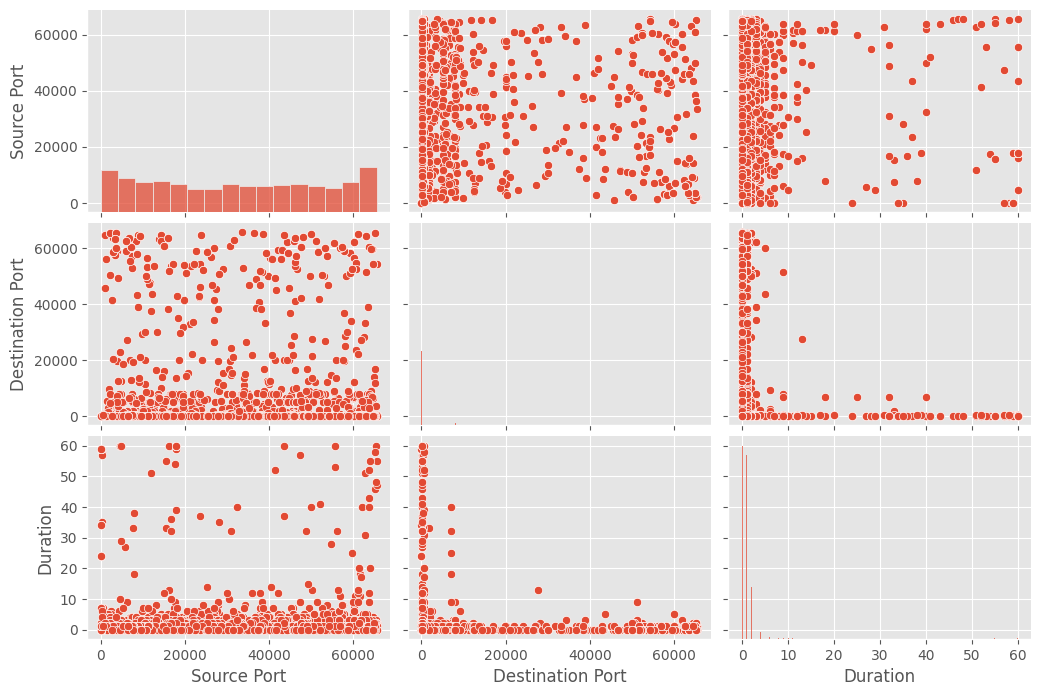

In [45]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11, 7)
plt.show()

In [46]:
newdf['Destination IP'].value_counts()

,count
Destination IP,
149.171.126.13,682
149.171.126.12,611
149.171.126.14,597
149.171.126.11,578
149.171.126.17,527
149.171.126.15,516
149.171.126.18,491
149.171.126.19,471
149.171.126.10,445


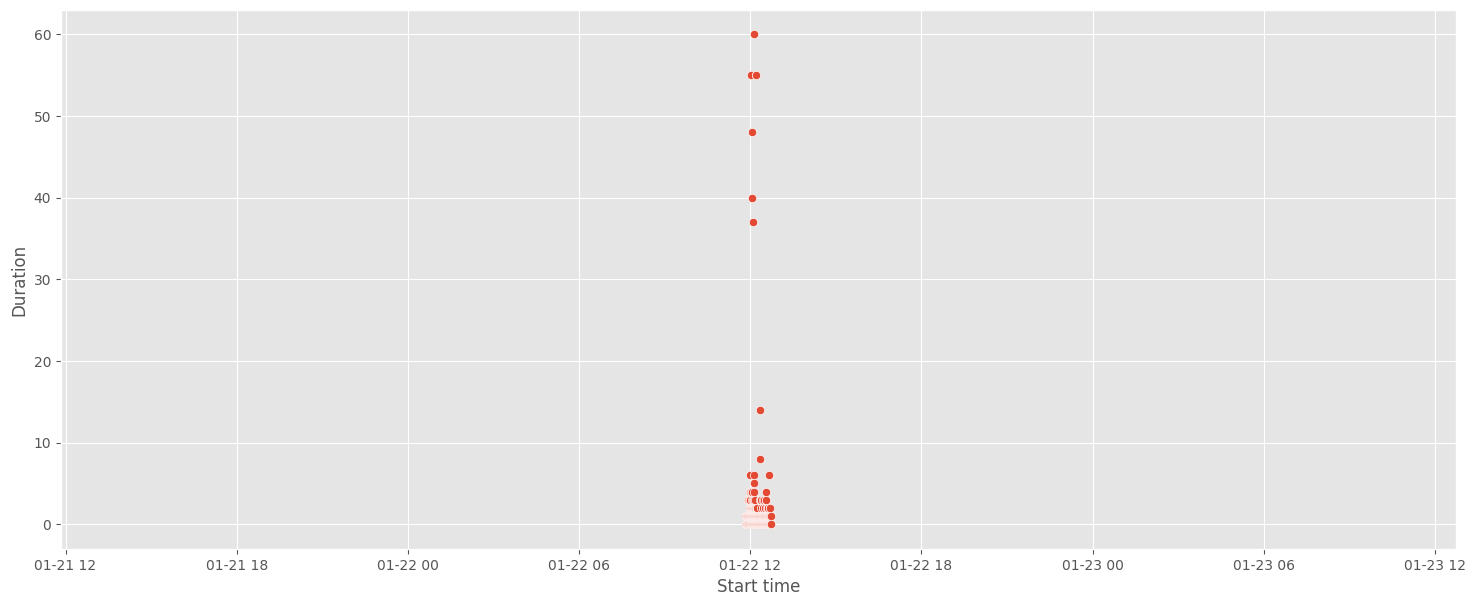

In [47]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Duration'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

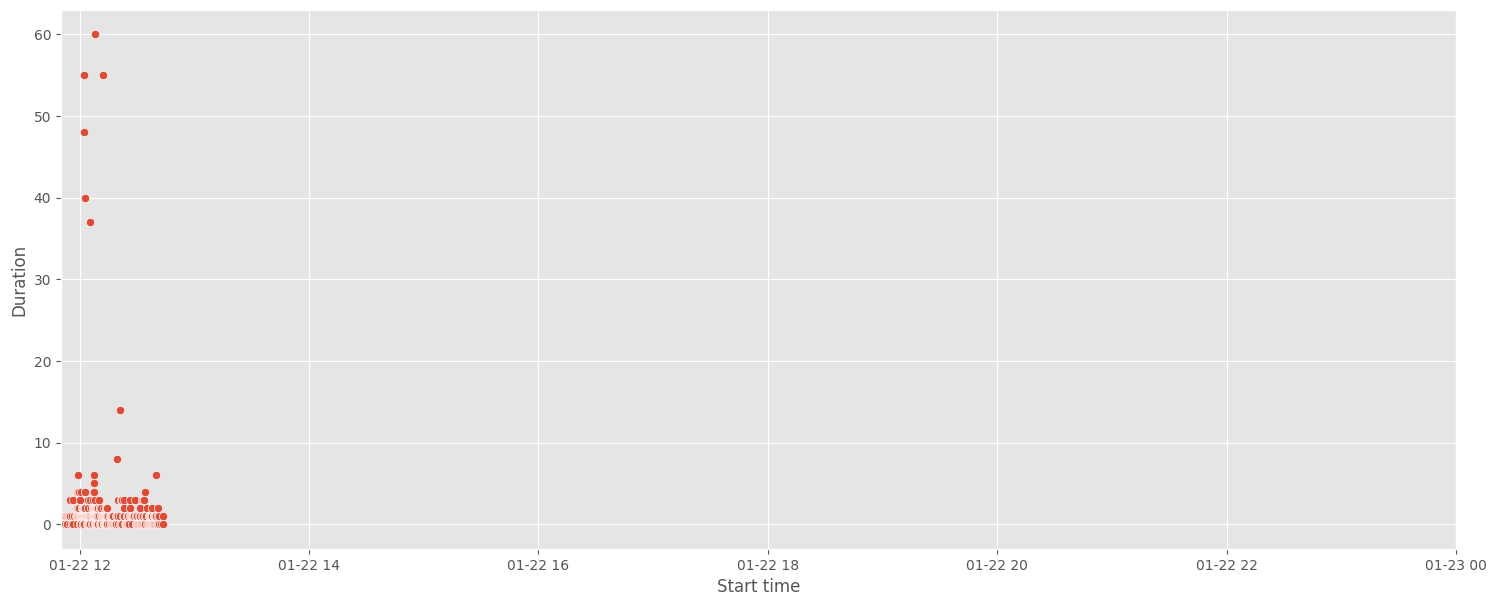

In [48]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Duration'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))

plt.grid(True)
plt.show()

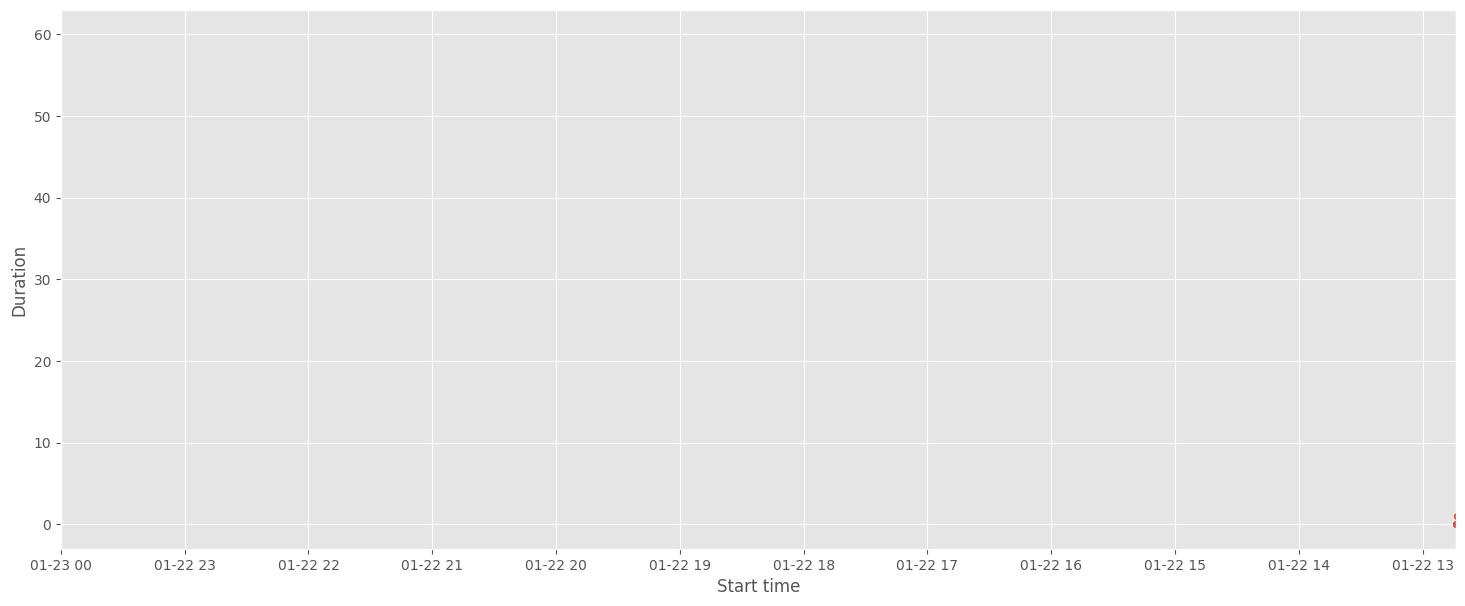

In [50]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP'] == '149.171.126.17']['Start time'],
                y=newdf[newdf['Destination IP'] == '149.171.126.17']['Duration'])
plt.xlim(left=datetime.strptime('15-01-23', '%y-%m-%d'),right=newdf['Start time'].max())

plt.grid(True)
plt.show()

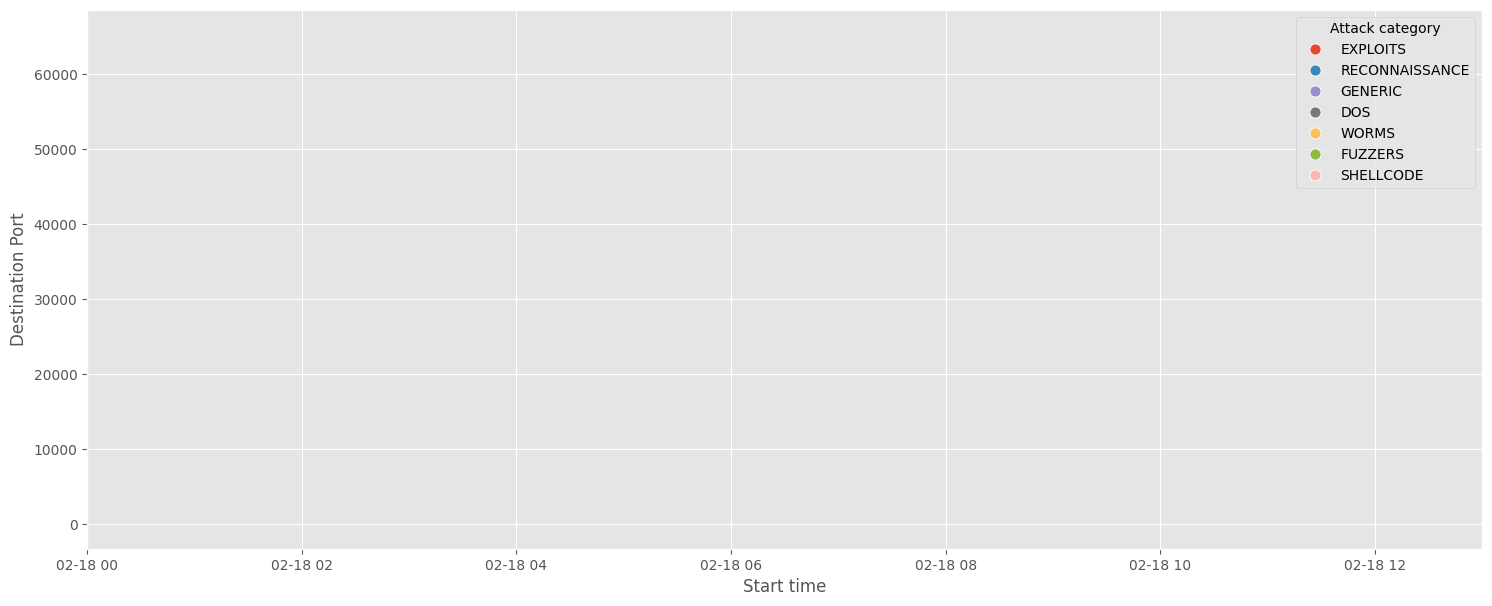

In [52]:

newdf['Start time'] = pd.to_datetime(newdf['Start time'])
filtered_df = newdf[newdf['Destination IP'] == '149.171.126.17']

plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', data=filtered_df, s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))

plt.grid(True)
plt.show()